In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%autosave 5

# necessary modules -------------------------------------------------------------------------------------
import sys
import os
sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/modules/')
sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/modules/pyfesom2')
sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/')
sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/modules/SkillMetrics/')
sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/modules/cmocean-master/')
import skill_metrics as sm
import pyfesom2 as pf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import matplotlib.colors as colors
import time
from datetime import date
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from load_interp_GLODAP_python3 import GLODAPdata

Autosaving every 5 seconds


In [2]:
runid      =  'fesom'
resultpath = '/work/ollie/ogurses/output_f2r2/fesom2.1_recom_New_Initial_Conditions/A/'
meshpath = '/work/ollie/loziel/mesh/core2_meanz/'
# period of analysis 
first_year = 2012
last_year  = 2021
depth_limit = 50
mapproj = 'rob' # pf.get_proj('rob')
box=[-180, 180, -90, 90]

ncfileDO2      = '/work/ollie/ogurses/input/corrected_input/woa18_all_o00_01_mmol_fesom2.nc'
savepath       = !pwd

mesh       = pf.load_mesh(meshpath)
meshdiag = pf.get_meshdiag(mesh)
years = np.arange(first_year, last_year+1,1)

unit_do2 = 'DO2 [mmol m$^{-3}$]' # equals to mumol/L

/work/ollie/loziel/mesh/core2_meanz/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ollie/loziel/mesh/core2_meanz/pickle_mesh_py3_fesom2


In [3]:
!jupyter nbconvert --to=python /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/DO2_WOA_Comparison_python3.ipynb
from DO2_WOA_Comparison_python3 import DO2comp

DO2data_0_10m = DO2comp(runid,resultpath,savepath,mesh,ncfileDO2,first_year,last_year, upper_depth_limit = 0, lower_depth_limit = 10, 
                  plotting = False, output = True, Taylor = False)

[NbConvertApp] Converting notebook /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/DO2_WOA_Comparison_python3.ipynb to python
[NbConvertApp] Writing 17035 bytes to /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/DO2_WOA_Comparison_python3.py
***
Loading WOA file: /work/ollie/ogurses/input/corrected_input/woa18_all_o00_01_mmol_fesom2.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)
WOA DO2 as mean over depths 
2.5-15.0 
 FESOM DO2 as mean over depths 
 -0.0-10.0

FESOM mean = 276.9131, std = 53.5083, min = 157.9611, max = 367.7609
WOA mean = 292.4578, std = 67.7559, min = 175.8675, max = 479.3693


In [4]:
DO2data_300_500m = DO2comp(runid,resultpath,savepath,mesh,ncfileDO2,first_year,last_year, upper_depth_limit = 300, lower_depth_limit = 500, 
                  plotting = False, output = True, Taylor = False)

***
Loading WOA file: /work/ollie/ogurses/input/corrected_input/woa18_all_o00_01_mmol_fesom2.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)
WOA DO2 as mean over depths 
310.0-535.0 
 FESOM DO2 as mean over depths 
 280.0-490.0

FESOM mean = 138.5638, std = 113.9957, min = -0.0032, max = 316.0726
WOA mean = 131.3141, std = 109.9966, min = 0.0000, max = 331.7994


In [5]:
DO2data_300_500m = DO2comp(runid,resultpath,savepath,mesh,ncfileDO2,first_year,last_year, upper_depth_limit = 100, lower_depth_limit = 600, 
                  plotting = False, output = True, Taylor = False)

***
Loading WOA file: /work/ollie/ogurses/input/corrected_input/woa18_all_o00_01_mmol_fesom2.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)
WOA DO2 as mean over depths 
107.5-630.0 
 FESOM DO2 as mean over depths 
 100.0-580.0

FESOM mean = 159.8700, std = 104.9930, min = -0.0074, max = 313.6053
WOA mean = 157.7856, std = 102.8816, min = 0.0000, max = 334.0828


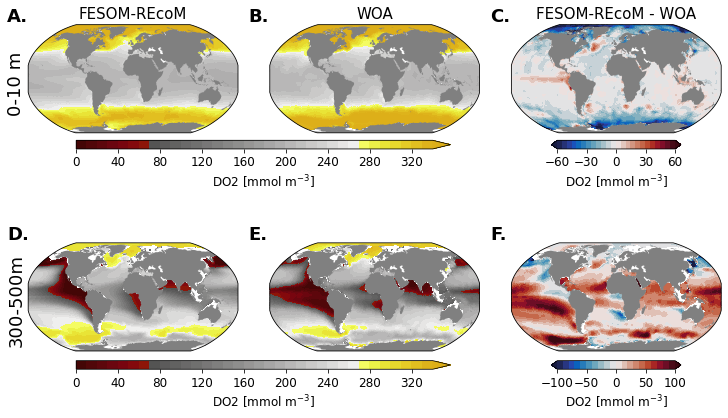

In [5]:
fig, ax = pf.create_proj_figure(mapproj, (2,3), (10,6))
#fig.tight_layout(pad=3.0)

ax = ax.flatten()

levels_do2 = np.arange(0,341,10)
levels_do2_anom = np.arange(-60,61,5)
levels_do2_anom_ticks = np.arange(-60,75,30)

m1 = ax[0]
f1 = pf.subplot(mesh, fig, m1, [DO2data_0_10m.fesom], 
                                levels = levels_do2,
                                units=unit_do2, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.oxy,
                                cmap_extension='max',
                                titles='FESOM-REcoM',
                                title_size = 15,
                               )

m2 = ax[1]
f2 = pf.subplot(mesh, fig, m2, [DO2data_0_10m.woa], 
                                levels = levels_do2,
                                units=unit_do2, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.oxy,
                                cmap_extension='max',
                                titles='WOA',
                                title_size = 15,
                               )


cbar1_ax = fig.add_axes([0.1, 0.59, 0.52, 0.02])
cbar1 = fig.colorbar(f1,
                                    cax = cbar1_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04) 
cbar1.set_label(unit_do2, fontsize=12)
cbar1.ax.tick_params(labelsize=12)


levels = np.arange(-100,120,20)

m3 = ax[2]
f3 = pf.subplot(mesh, fig, m3, [DO2data_0_10m.fesom - DO2data_0_10m.woa], 
                                levels = levels_do2_anom,
                                units=unit_do2, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.balance,
                                cmap_extension='both',
                                titles='FESOM-REcoM - WOA',
                                title_size = 15,
                               )

cbar3_ax = fig.add_axes([0.76, 0.59, 0.18, 0.02])
cbar3 = fig.colorbar(f3,
                                    cax = cbar3_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04,
                                    ticks = levels_do2_anom_ticks) 
cbar3.set_label(unit_do2, fontsize=12)
cbar3.ax.tick_params(labelsize=12)


levels_do2 = np.arange(0,341,10)
levels_do2_anom = np.arange(-100,110,10)
levels_do2_anom_ticks = np.arange(-100,150,50)

m4 = ax[3]
f4 = pf.subplot(mesh, fig, m4, [DO2data_300_500m.fesom], 
                                levels = levels_do2,
                                units=unit_do2, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.oxy,
                                cmap_extension='max',
                                titles='',
                                title_size = 15,
                               )

m5 = ax[4]
f5 = pf.subplot(mesh, fig, m5, [DO2data_300_500m.woa], 
                                levels = levels_do2,
                                units=unit_do2, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.oxy,
                                cmap_extension='max',
                                titles='',
                                title_size = 15,
                               )


cbar5_ax = fig.add_axes([0.1, 0.08, 0.52, 0.02])
cbar5 = fig.colorbar(f5,
                                    cax = cbar5_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04) 
cbar5.set_label(unit_do2, fontsize=12)
cbar5.ax.tick_params(labelsize=12)


levels = np.arange(-100,120,20)

m6 = ax[5]
f6 = pf.subplot(mesh, fig, m6, [DO2data_300_500m.fesom - DO2data_300_500m.woa], 
                                levels = levels_do2_anom,
                                units=unit_do2, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.balance,
                                cmap_extension='both',
                                titles='',
                                title_size = 15,
                               )

cbar6_ax = fig.add_axes([0.76, 0.08, 0.18, 0.02])
cbar6 = fig.colorbar(f6,
                                    cax = cbar6_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04,
                                    ticks = levels_do2_anom_ticks) 
cbar6.set_label(unit_do2, fontsize=12)
cbar6.ax.tick_params(labelsize=12)


m1.text(-0.1, 1.03, 'A.', transform=m1.transAxes,
            size=18, weight='bold')
m2.text(-0.1, 1.03, 'B.', transform=m2.transAxes,
            size=18, weight='bold')
m3.text(-0.1, 1.03, 'C.', transform=m3.transAxes,
            size=18, weight='bold')
m4.text(-0.1, 1.03, 'D.', transform=m4.transAxes,
            size=18, weight='bold')
m5.text(-0.1, 1.03, 'E.', transform=m5.transAxes,
            size=18, weight='bold')
m6.text(-0.1, 1.03, 'F.', transform=m6.transAxes,
            size=18, weight='bold')

m1.text(-0.1, 0.2, '0-10 m', transform=m1.transAxes,
            size=18, rotation=90)
m4.text(-0.1, 0.08, '300-500m', transform=m4.transAxes,
            size=18, rotation=90)

plt.savefig('FIG_DO2_MAPS.png', dpi = 300, bbox_inches='tight',transparent=False)
plt.savefig('FIG_DO2_MAPS.pdf', bbox_inches='tight',transparent=False)

In [ ]:
title = 'Taylor Diagram for DO$_2$ \n(mean over depth, max = 300-500m)'
plt_Taylor_norm(O2_int_ma_mean,DO2fesom_mean,mask=True,title=title,verbose = self.verbose)